## Visualize What-If Scenarios

In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
re.compile('<title>(.*)</title>')

sns.set()

In [11]:
problem = 'what-if_cui'
#problem = 'what-if_initial'

### Systematically collate plant data across scenarios

In [12]:
pdata = []
for filename in sorted(glob(f"output/{problem}/*plants.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
    cap = float(matches[0])
    cost = int(matches[1])
    pld = pd.read_csv(filename)
    pld["filename"] = filename
    pld["Storage Limit (%)"] = cap*100
    pld["Storage Cost ($/tonne/yr)"] = cost
    pdata += [pld]
    
pdata = pd.concat(pdata)
display(pdata.describe().T)

,count,mean,std,min,25%,50%,75%,max
year,73080.0,1.450000e+01,8.077802e+00,1.0000,7.7500,1.450000e+01,2.125000e+01,2.800000e+01
latitude (deg),73080.0,3.813084e+01,4.660471e+00,27.0209,34.4769,3.868210e+01,4.177520e+01,4.850930e+01
longitude (deg),73080.0,-9.286720e+01,1.282899e+01,-123.2633,-104.7574,-9.100200e+01,-8.258720e+01,-7.107390e+01
capacity (tonne),73080.0,2.464040e+03,2.264994e+03,801.0000,801.0000,8.010000e+02,5.628000e+03,5.628000e+03
amount processed (tonne),73080.0,2.131317e+03,2.498918e+03,0.0000,0.0000,8.010000e+02,5.628000e+03,5.628000e+03
amount received (tonne),73080.0,2.131317e+03,2.717236e+03,0.0000,0.0000,8.010000e+02,5.628000e+03,2.039199e+04
amount in storage (tonne),73080.0,2.278430e+02,8.771402e+02,0.0000,0.0000,0.000000e+00,0.000000e+00,1.693622e+04
utilization factor (%),73080.0,6.129921e+01,4.821085e+01,0.0000,0.0000,1.000000e+02,1.000000e+02,1.000000e+02
energy (GJ),73080.0,1.866969e+03,2.380217e+03,0.0000,0.0000,7.016500e+02,4.929960e+03,1.786277e+04
opening cost ($),73080.0,6.673522e+05,3.502150e+06,0.0000,0.0000,0.000000e+00,0.000000e+00,2.700000e+07


### Systematically collate plant output data across scenarios

In [14]:
ddata = []
for filename in sorted(glob(f"output/{problem}/*outputs.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
#     cap = int(float(matches[0]))
#     cost = int(matches[1])
    cap = float(matches[0])
    cost = int(matches[1])
#     print(matches,'   |   ',cap, cost)
    dd = pd.read_csv(filename)
    dd["filename"] = filename
    dd["Storage Limit (%)"] = cap*100
    dd["Storage Cost ($/tonne/yr)"] = cost
    ddata += [dd]
    
ddata = pd.concat(ddata)
display(ddata.describe().T)

,count,mean,std,min,25%,50%,75%,max
year,1169280.0,14.500000,8.077751,1.0,7.75,14.50,21.25,28.00
amount produced (tonne),1169280.0,133.207683,497.499702,0.0,0.00,0.39,22.48,3359.27
amount sent (tonne),1169280.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
amount disposed (tonne),1169280.0,133.207683,497.499702,0.0,0.00,0.39,22.48,3359.27
disposal cost ($),1169280.0,494.680068,3007.637177,0.0,0.00,0.00,0.00,32069.21
Storage Limit (%),1169280.0,155.000000,136.381875,25.0,50.00,100.00,200.00,400.00
Storage Cost ($/tonne/yr),1169280.0,200.000000,202.072681,0.0,50.00,125.00,300.00,600.00


### Systematically collate transport data across scenarios

In [15]:
tdata = []
for filename in sorted(glob(f"output/{problem}/*tr.csv")):
    matches = re.findall(r"_cap_([0.0-9.0]*)_cost_(\d+)", filename)[0]
    cap = float(matches[0])
    cost = int(matches[1])
    td = pd.read_csv(filename)
    td["filename"] = filename
    td["Storage Limit (%)"] = cap*100
    td["Storage Cost ($/tonne/yr)"] = cost
    tdata += [td]
    
tdata = pd.concat(tdata)
display(tdata.describe().T)

,count,mean,std,min,25%,50%,75%,max
source latitude (deg),846468.0,38.972694,4.460288,26.677092,35.847070,39.100507,42.313044,4.802902e+01
source longitude (deg),846468.0,-91.637929,13.895602,-121.494595,-101.500004,-89.522744,-80.563731,-6.924795e+01
destination latitude (deg),846468.0,37.476756,4.490497,27.020900,34.444300,36.392800,40.592300,4.850930e+01
destination longitude (deg),846468.0,-92.896516,8.950995,-123.263300,-97.289400,-92.630900,-87.019800,-7.107390e+01
year,846468.0,14.500000,8.077752,1.000000,7.750000,14.500000,21.250000,2.800000e+01
distance (km),846468.0,724.525516,541.181424,4.910000,321.490000,589.020000,1016.810000,3.201720e+03
amount (tonne),846468.0,184.007703,859.661067,0.000000,0.000000,0.000000,0.000000,2.039199e+04
amount-distance (tonne-km),846468.0,117519.967289,739563.946769,0.000000,0.000000,0.000000,0.000000,2.832169e+07
transportation cost ($),846468.0,11331.741577,71311.690380,0.000000,0.000000,0.000000,0.000000,2.730890e+06
transportation energy (GJ),846468.0,319.654317,2011.613946,0.000000,0.000000,0.000000,0.000000,7.703500e+04


### Prepare data for visualization

In [16]:

#Battery amount and Acquisition cost 
batteries_tonne = pdata['amount processed (tonne)'].sum()
acquisition = 358 # $/tonne

# total plant cost
pin = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()[
    "total cost ($)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "total cost ($)",
)


# Transport cost
tin = tdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()['transportation cost ($)'].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "transportation cost ($)",
)

# disposal cost
din = ddata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()['disposal cost ($)'].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "disposal cost ($)",
)

# amount of battery recycled
bat_amt = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).sum()[
    "amount processed (tonne)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "amount processed (tonne)",
)

### Specific Recycling cost

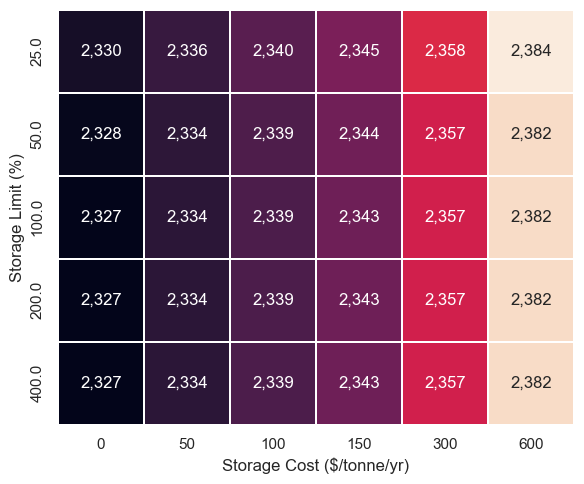

In [17]:
sum_per_battery = ((pin+tin+din)/bat_amt) + acquisition 


fig, ax = plt.subplots(
    figsize=(6,5),
)
sns.heatmap(
    sum_per_battery,
    annot=True,
    fmt=",.0f",
    cbar=False,
    linewidths=0.25,
);
plt.tight_layout()
fig.savefig(f"figures/{problem}/HeatMapCostPerBat.pdf", dpi=300)
# fig.savefig("figures/whatif/HeatMapCostPerBat.png", dpi=300)

### Plant Utilization

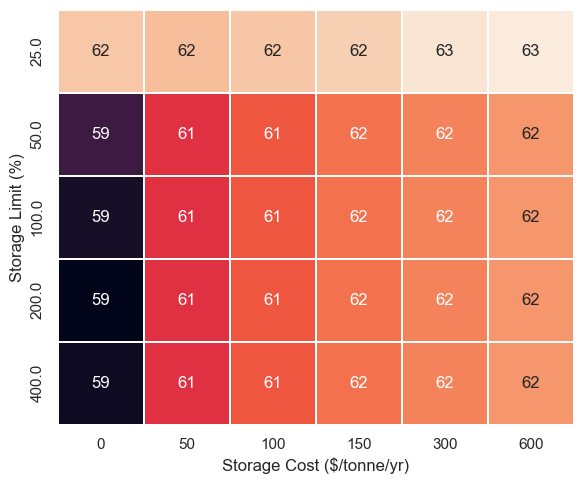

In [8]:
summary = pdata.groupby([
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)"
]).mean()[
    "utilization factor (%)"
].reset_index().pivot(
    "Storage Limit (%)",
    "Storage Cost ($/tonne/yr)",
    "utilization factor (%)",
)

fig, ax = plt.subplots(
    figsize=(6,5),
)
sns.heatmap(
    summary,
    annot=True,
    fmt=",.0f",
    cbar=False,
    linewidths=0.25,
);
plt.tight_layout()

fig.savefig(f"figures/{problem}/HeatMapUtilization.pdf", dpi=300)
# fig.savefig("figures/whatif/HeatMapCostPerBat.png", dpi=300)